# Ham or Spam

In [259]:
#pip install wordcloud

In [260]:
import warnings
warnings.filterwarnings("ignore")

In [261]:
import pandas as pd

In [262]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [263]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [264]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1)
#df = df[["v1","v2"]])

In [265]:
df.columns = ["Class","Text"]

In [266]:
df.head()

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [267]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

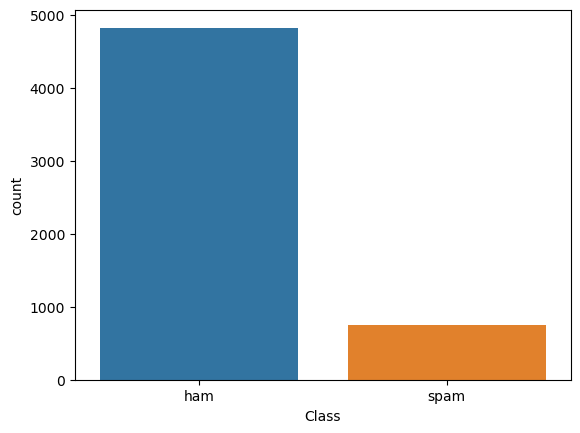

In [268]:
sns.countplot(x= df["Class"])

In [269]:
df.shape

(5572, 2)

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [271]:
df["Class"].value_counts()

Class
ham     4825
spam     747
Name: count, dtype: int64

In [272]:
d = {"ham": 0, "spam": 1}

In [273]:
df["Class"] = df["Class"].map(d)

In [274]:
df.head()

,Class,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


When starting an NLP project:<br>
1- convert each letter to lowercase<br>
2- punctuation marks left<br>
3- remove digits<br>
4- remove line breaks<br>
5- remove unnecessary words - stopwords<br>
6- tokenize<br>
7- Remove suffixes and find roots with lemma and stemm<br>
8- vectorize<br>

In [275]:
df["Text"] = df["Text"].str.lower()

In [276]:
df["Text"] = df["Text"].str.replace('[^\w\s]', '', regex=True)

In [279]:
df["Text"] = df["Text"].str.replace("\n"," ", regex=True)

In [281]:
df["Text"] = df["Text"].str.replace("\r"," ", regex=True)

In [280]:
df["Text"] = df["Text"].str.replace('\d+', '', regex=True)

In [282]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [283]:
from PIL import Image

In [284]:
import numpy as np
import matplotlib.pyplot as plt

In [285]:
# DRY - dont try urself

In [300]:
def wc(data,bgcolor):
    plt.figure(figsize = (10,10))
    mask = np.array(Image.open("heart.jpeg"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS,mask =mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")


In [301]:
ham = df[df["Class"] == 0]["Text"]
spam = df[df["Class"] == 1]["Text"]

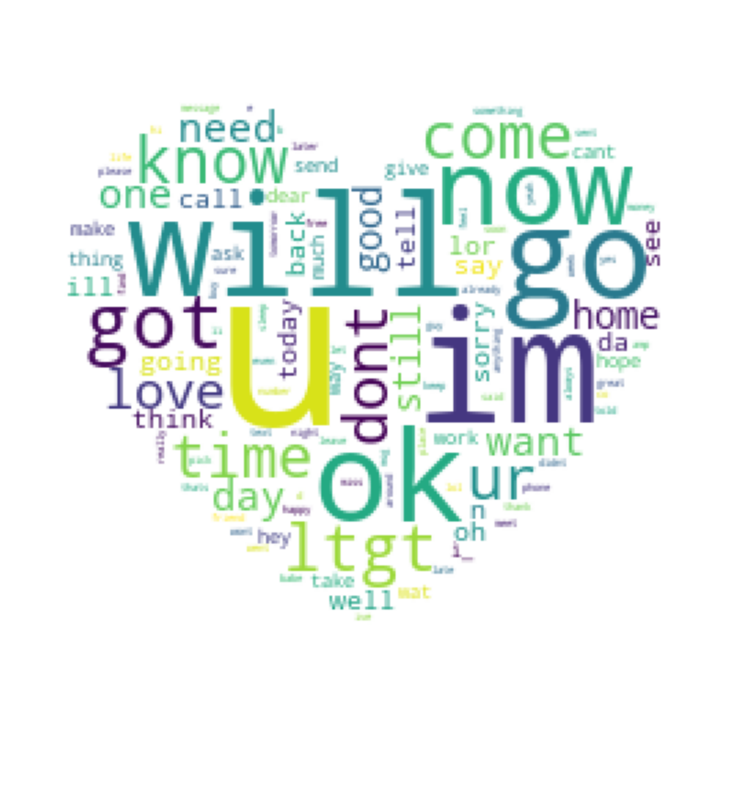

In [302]:
wc(ham,"white")

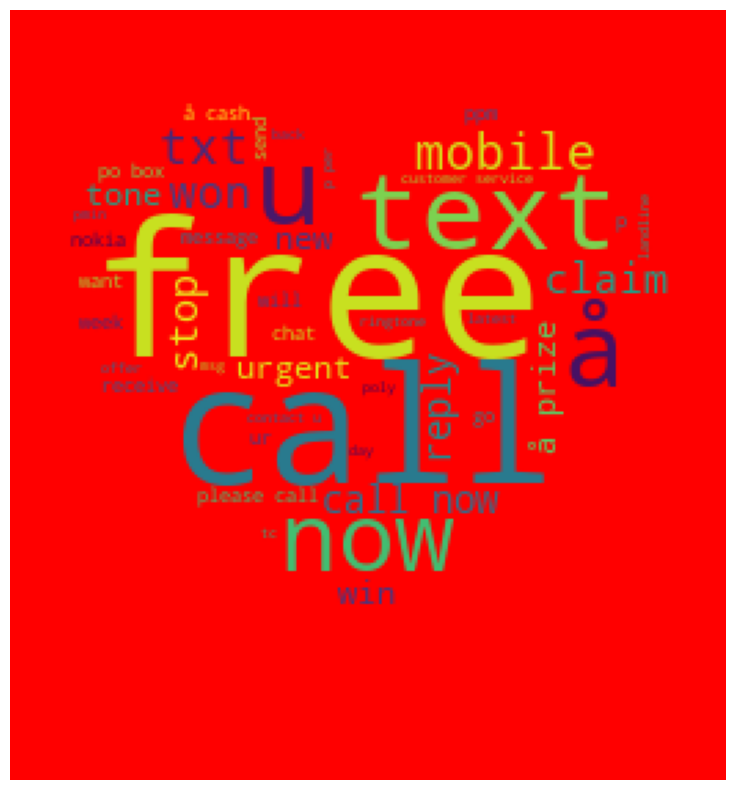

In [303]:
wc(spam,"red")

In [329]:
x = df["Text"]
y = df["Class"]

In [330]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer

In [331]:
pr = PorterStemmer()

In [333]:
def lemmafn(text):
    words = TextBlob(text).words
    return [pr.stem(word) for word in words ]

In [334]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), analyzer = lemmafn)

In [339]:
x = vect.fit_transform(x)

In [340]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=42, test_size = .2) 

In [341]:
nb = MultinomialNB()

In [342]:
model = nb.fit(x_train,y_train)

In [343]:
tahmin = model.predict(x_test)

In [345]:
accuracy_score(tahmin, y_test)

0.9766816143497757